## Observations and Insights 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
study_df.shape

(1893, 8)

In [55]:
# Checking the number of mice.
study_df['Mouse ID'].nunique()

249

In [56]:
study_df['Mouse ID'].value_counts()

g989    13
u364    10
c559    10
b742    10
m546    10
        ..
n482     1
b447     1
l872     1
o848     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [57]:
# Checking the mouse IDs with multiple values.
study_df[study_df["Mouse ID"].duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_df[study_df.duplicated(subset = ["Mouse ID", "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
# Confirmed duplicate values by filtering data by Mouse ID. Duplicates confirmed.
duplicate_mouse = study_df[study_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = study_df[study_df["Mouse ID"] != "g989"]
clean_study_df.shape

(1880, 8)

In [61]:
# Checking the number of mice in the clean DataFrame.
clean_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [62]:
clean_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_df = pd.DataFrame({"Mean": clean_study_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean(),
                          "Median":clean_study_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median(),
                           "Variance": clean_study_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var(),
                           "Standard Deviation":clean_study_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std(),
                          "SEM": clean_study_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()})
grouped_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:
tumor_vol_df = clean_study_df.groupby("Drug Regimen")
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_table = tumor_vol_df.agg({"Tumor Volume (mm3)":["mean","median","var", "std","sem", "count"]})
tumor_summary_table

Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

                    
             count  
Drug Regimen        
Capomulin      230  
Ceftamin       178  
Infubinol      178  
Ketapril       188  
Naftisol       186  
Placebo        181  
Propriva       148  
Ramicane       228  
Stelasyn       181  
Zoniferol      182

## Bar and Pie Charts

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



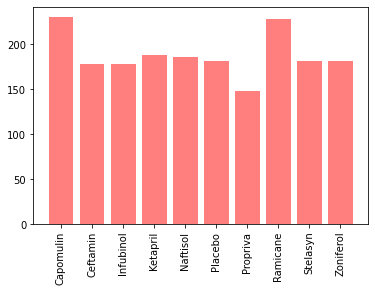

In [86]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tumor_table_short = tumor_summary_table["Tumor Volume (mm3)"]
x_axis = np.arange(len(tumor_summary_table))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis,tumor_table_short['count'],color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, tumor_table_short.index, rotation="vertical")
plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
